# Get Data

In [351]:
# Only use full for Google colab
try:
    import google.colab
    print("Running on Google Colab")
    import subprocess

    def run_command(command):
        """Runs a command line command."""
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
        output, err = process.communicate()
        return output.decode("utf-8")
    run_command("wget https://raw.githubusercontent.com/anilkumarKanasani/tensorflow-deep-learning/main/Notebooks/helper_functions.py")
    print("Data Import completed on Google Colab")

except:
    print("Not running on Google Colab")

Not running on Google Colab


In [352]:
# pandas read csv with parse_dates as index_col
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                    parse_dates=['Date'],
                    index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [353]:
# rename columns Close to price (USD) to price
df.rename(columns={'Closing Price (USD)': 'Price'}, inplace=True)
df.head()

,Currency,Price,24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


We will use the Price column as the predicted variable and all the other numerical columns as features.

# Explore Data

In [354]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Currency        2787 non-null   object 
 1   Price           2787 non-null   float64
 2   24h Open (USD)  2787 non-null   float64
 3   24h High (USD)  2787 non-null   float64
 4   24h Low (USD)   2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [355]:
# Get the date range of the data
print(f"Earliest date: {df.index.min()}, \nLatest date: {df.index.max()}, \nNumber of days: {df.index.max() - df.index.min()}")

Earliest date: 2013-10-01 00:00:00, 
Latest date: 2021-05-18 00:00:00, 
Number of days: 2786 days 00:00:00


In [356]:
# Do we have a sample for every day?
print(f"Number of days in total: {len(df)}")
print(f"Number of days with samples: {len(df.index.unique())}")

Number of days in total: 2787
Number of days with samples: 2787


In [357]:
# Do we have any missing days?
print(f"Number of missing days: {len(df) - len(df.index.unique())}")

Number of missing days: 0


In [358]:
# missing values in the data
df.isna().sum()

Currency          0
Price             0
24h Open (USD)    0
24h High (USD)    0
24h Low (USD)     0
dtype: int64

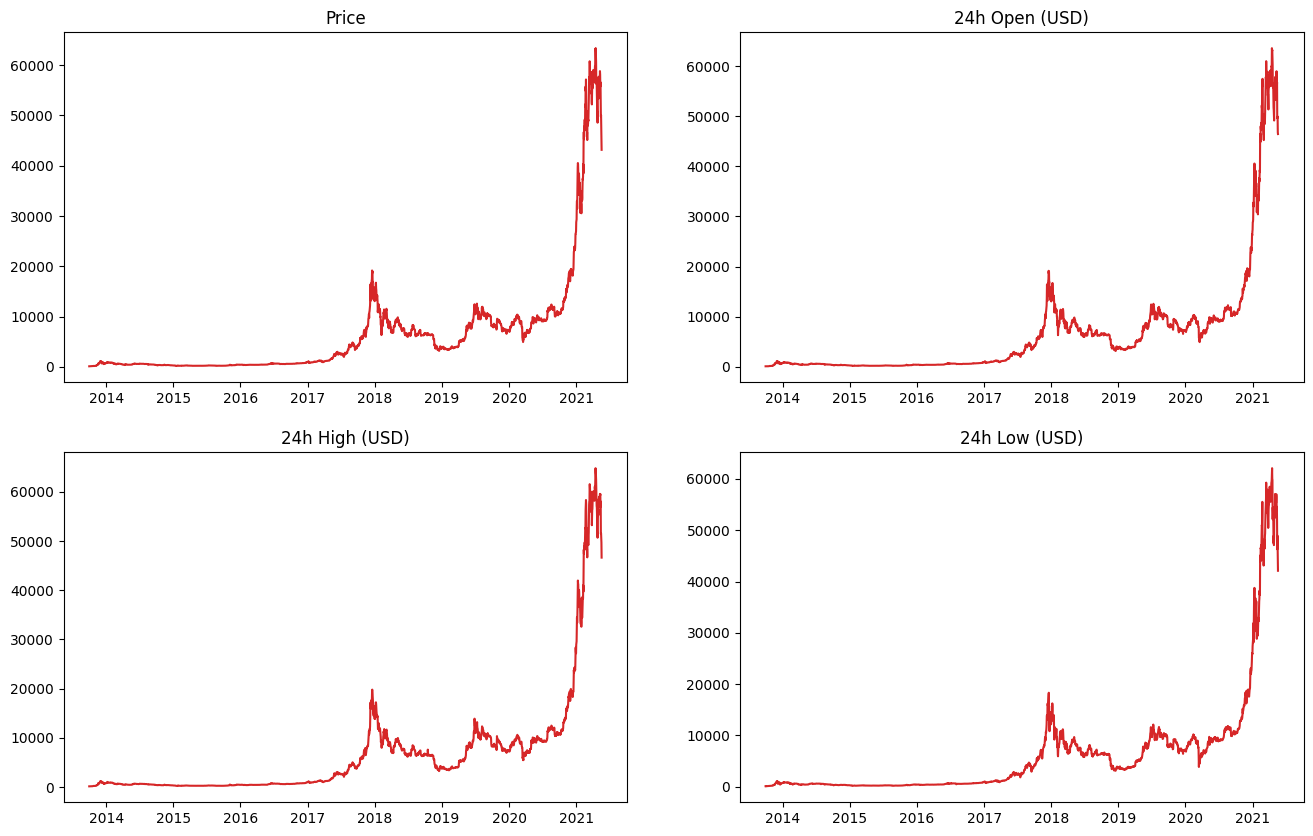

In [359]:
# define a function to take column name as input and plot the data
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show() 

# plot the data for closing price, 24h Open, 24h High, 24h Low as subplots in 2 rows and 2 columns
plt.figure(figsize=(16,10), dpi=100)
plt.subplot(2,2,1)
plt.plot(df.index, df['Price'], color='tab:red')
plt.title('Price')
plt.subplot(2,2,2)
plt.plot(df.index, df['24h Open (USD)'], color='tab:red')
plt.title('24h Open (USD)')
plt.subplot(2,2,3)
plt.plot(df.index, df['24h High (USD)'], color='tab:red')
plt.title('24h High (USD)')
plt.subplot(2,2,4)
plt.plot(df.index, df['24h Low (USD)'], color='tab:red')
plt.title('24h Low (USD)')
plt.show()

In [360]:
# Is all the columns are correlated?
df.corr()

,Price,24h Open (USD),24h High (USD),24h Low (USD)
Price,1.000000,0.998892,0.999527,0.999403
24h Open (USD),0.998892,1.000000,0.999476,0.999096
24h High (USD),0.999527,0.999476,1.000000,0.999028
24h Low (USD),0.999403,0.999096,0.999028,1.000000


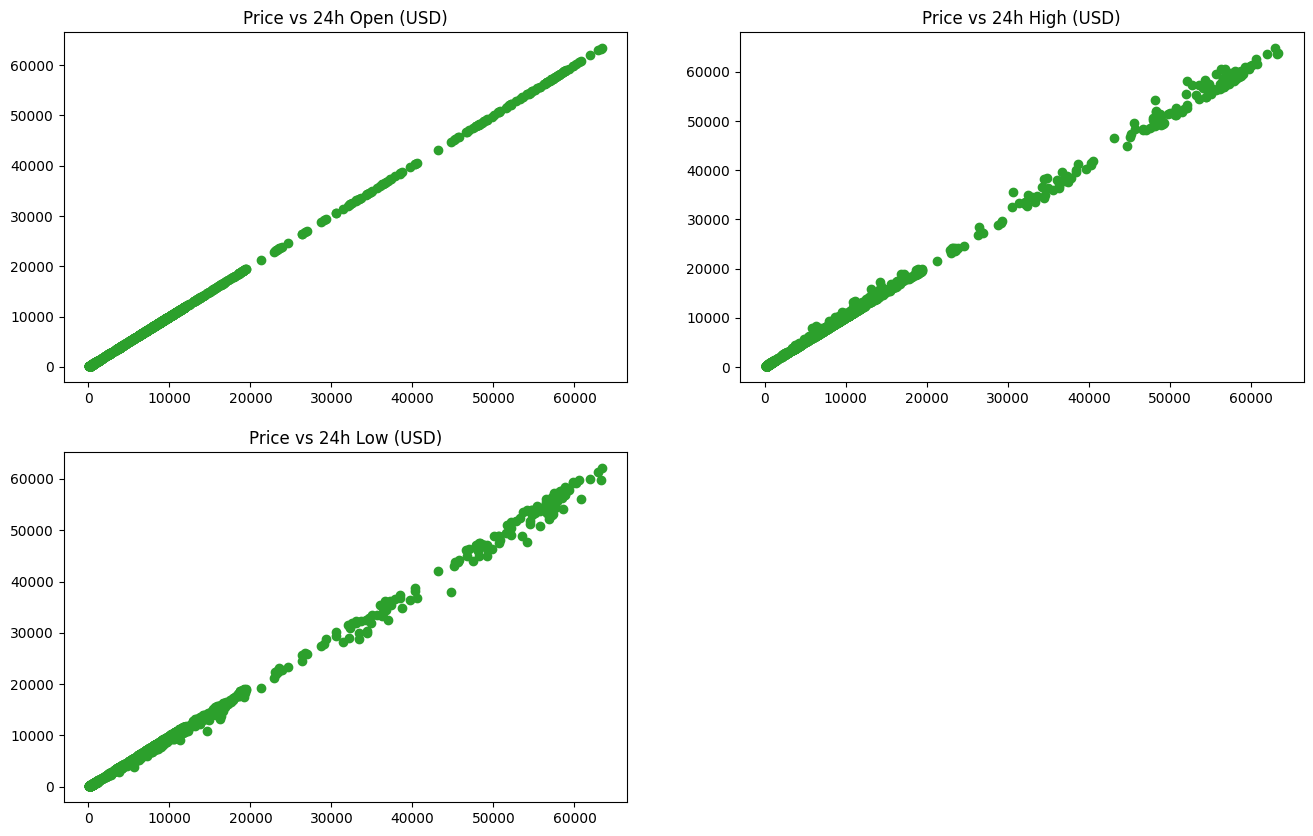

In [361]:
# scatter plot for all the columns as subplots in 2 rows and 2 columns
plt.figure(figsize=(16,10), dpi=100)
plt.subplot(2,2,1)
plt.scatter(df['Price'], df['Price'], color='tab:green')
plt.title('Price vs 24h Open (USD)')
plt.subplot(2,2,2)
plt.scatter(df['Price'], df['24h High (USD)'], color='tab:green')
plt.title('Price vs 24h High (USD)')
plt.subplot(2,2,3)
plt.scatter(df['Price'], df['24h Low (USD)'], color='tab:green')
plt.title('Price vs 24h Low (USD)')
plt.show()

# Split Data

In [362]:
# total number of samples
len(df)

2787

In [363]:
# split the data into train and test
split_size = int(len(df) * 0.8)
train_df = df[:split_size]
test_df = df[split_size:]
len(train_df), len(test_df)

(2229, 558)

In [364]:
# Percentage of train and test data
print(f"Percentage of train data: {len(train_df)/len(df)*100:.2f}%")
print(f"Percentage of test data: {len(test_df)/len(df)*100:.2f}%")

Percentage of train data: 79.98%
Percentage of test data: 20.02%


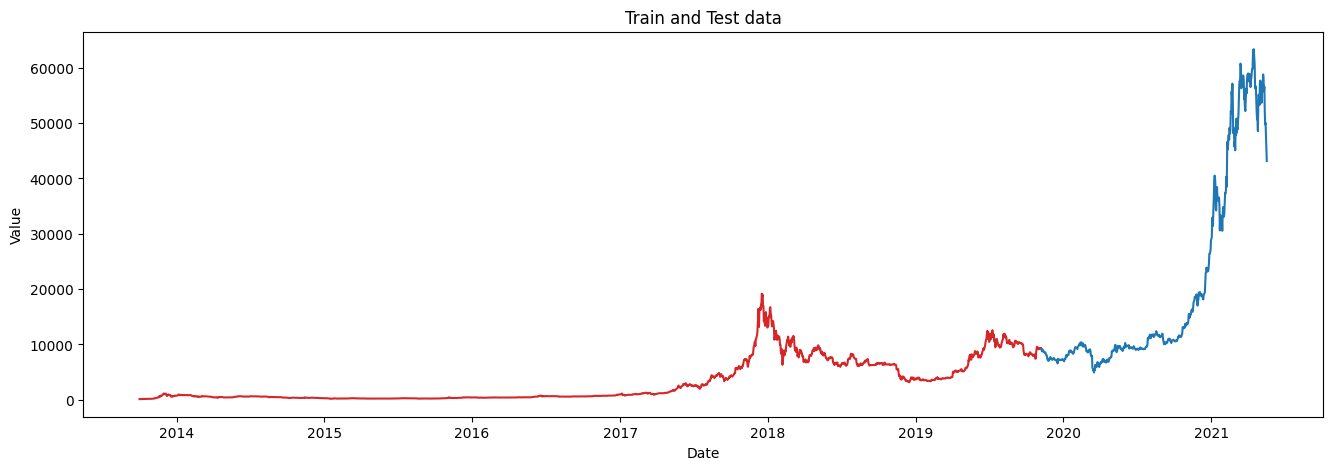

In [365]:
# plot the train and test data as function of time with start and end date
def plot_train_test(train_df, test_df, title="", xlabel='Date', ylabel='Value', start=0, end=None, dpi=100):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(train_df.index[start:end], train_df['Price'][start:end], color='tab:red')
    plt.plot(test_df.index, test_df['Price'], color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_train_test(train_df, test_df, start=0, end=None,title='Train and Test data')


In [366]:
# get X_train, y_train, X_test, y_test
X_train, y_train = train_df.drop(['Price','Currency'], axis=1), train_df['Price']
X_test, y_test = test_df.drop(['Price','Currency'], axis=1), test_df['Price']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229, 3), (2229,), (558, 3), (558,))

# Prediction Models

* Model 0 : Naive Model (baseline)
* Model 1 : Dense Model , Horizon = 1, window_size = 7
* Model 2 : Same as Model 1 , Horizon = 1, window_size = 30
* Model 3 : Same as Model 1 , Horizon = 7, window_size = 30
* Model 4 : Conv1D
* Model 5 : LSTM
* Model 6 : Same as Model 1 with multivariate data
* Model 7 : N-BEATS Algorithm
* Model 8 : Ensemble Model
* Model 9 : Future Prediction Model
* Model 10 : Same as Model 1 with turkey data

## Evaluation Metrics

In [367]:
# A function to get Evaluation Metrics Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Mean absolute percentage error,
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# A custom function to calculate mean_absolute_scaled_error.
def mean_absolute_scaled_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mase = mae / mean_absolute_error(y_true[1:], y_true[:-1])
    return mase

def evaluate_preds(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mase = mean_absolute_scaled_error(y_true, y_pred)
    metric_dict = {"mae": round(mae,2),
                   "mse": round(mse,2),
                   "rmse": round(rmse,2),
                   "mape": round(mape,2),
                   "mase": round(mase,2)
                   }
    return metric_dict

## Helper Functions

In [368]:
# plot the naive_forcast and y_test as function of time with start and end date
def plot_forcast(y_test, y_pred, title="", xlabel='Date', ylabel='Value', start=0, end=None, dpi=100):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(y_test.index[start:end], y_test[start:end], color='tab:red')
    plt.plot(y_test.index[start:end], y_pred[start:end], color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

## Model 0 : Naive Model (baseline)

In [369]:
# Naive Model predict the next day price as today's price
naive_forcast = y_test.shift(1)
# data frame of naive_forcast and y_test
pd.DataFrame({'naive_forcast':naive_forcast, 'y_test':y_test})

,naive_forcast,y_test
Date,,
2019-11-08,NaN,9226.485821
2019-11-09,9226.485821,8794.358645
2019-11-10,8794.358645,8798.042055
2019-11-11,8798.042055,9081.186878
2019-11-12,9081.186878,8711.534339
...,...,...
2021-05-14,52147.821187,49764.132082
2021-05-15,49764.132082,50032.693137
2021-05-16,50032.693137,47885.625255


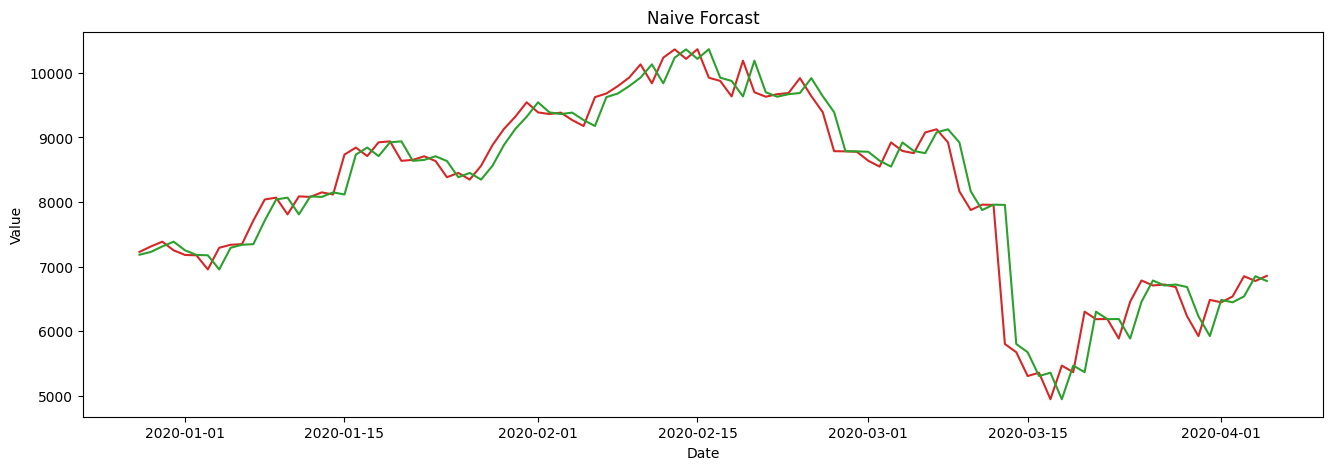

In [370]:
plot_forcast(y_test, naive_forcast, start=50, end=150,title='Naive Forcast')

In [371]:
# get the evaluation metrics for naive_forcast
naive_forcast_metrics = evaluate_preds(y_test[1:], naive_forcast[1:])
naive_forcast_metrics

{'mae': 567.98, 'mse': 1147547.13, 'rmse': 1071.24, 'mape': 2.52, 'mase': 1.0}

## Model 1 : Dense Model,  Horizon = 1, window_size = 7

In [372]:
# define a dense model with horizon and window_size as input
import tensorflow as tf

def dense_model(horizon, window_size):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(window_size)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(horizon)
    ])
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])
    return model

model_1 = dense_model(horizon=1, window_size=7)
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               1024      
                                                                 
 dense_39 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [373]:
def get_window_data(y_train,y_test, window_size, horizon):
    X_train_windowed = []
    y_train_Horizons = []
    for i in range(window_size,len(y_train)-window_size):
        X_train_windowed.append(y_train[i-window_size:i])
        y_train_Horizons.append(y_train[i:i+horizon])
    X_train_windowed = np.array(X_train_windowed)
    y_train_Horizons = np.array(y_train_Horizons)

    print(f"X_train_windowed shape: {X_train_windowed.shape}")
    print(f"y_train_Horizons shape: {y_train_Horizons.shape}")

    X_test_windowed = []
    y_test_Horizons = []
    for i in range(window_size,len(y_test)-window_size):
        X_test_windowed.append(y_test[i-window_size:i])
        y_test_Horizons.append(y_test[i:i+horizon])
    X_test_windowed = np.array(X_test_windowed)
    y_test_Horizons = np.array(y_test_Horizons)
    print(f"X_test_windowed shape: {X_test_windowed.shape}")
    print(f"y_test_Horizons shape: {y_test_Horizons.shape}")
    return X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons


X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_train,y_test, window_size=7, horizon=1)

X_train_windowed shape: (2215, 7)
y_train_Horizons shape: (2215, 1)
X_test_windowed shape: (544, 7)
y_test_Horizons shape: (544, 1)


In [374]:
# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_1 = model_1.fit(X_train_windowed, y_train_Horizons,
                        epochs=100,
                        batch_size=128,
                        validation_data=(X_test_windowed, y_test_Horizons))

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 530.2361 - mae: 530.2361 - val_loss: 901.1196 - val_mae: 901.1196
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 198.1953 - mae: 198.1953 - val_loss: 862.0113 - val_mae: 862.0113
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 161.8087 - mae: 161.8087 - val_loss: 979.4796 - val_mae: 979.4796
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 154.7157 - mae: 154.7157 - val_loss: 824.6252 - val_mae: 824.6252
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 149.1880 - mae: 149.1880 - val_loss: 778.2975 - val_mae: 778.2975
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 145.7087 - mae: 145.7087 - val_loss: 789.7953 - val_mae: 789.7953
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 140.6420 - mae: 140.6420 - val_loss: 728.0076 - val_mae: 728.0076
Epoch 8/100
18/18 [========

In [375]:
# get the evaluation metrics for model_1
model_1.evaluate(X_test_windowed, y_test_Horizons)

17/17 [==============================] - 0s 1ms/step - loss: 556.5065 - mae: 556.5065


[556.5065307617188, 556.5065307617188]

In [376]:
# y_pred for model_1
y_pred_1 = model_1.predict(X_test_windowed)
y_pred_1 = tf.squeeze(y_pred_1)
y_pred_1.shape , y_test_Horizons.shape

(TensorShape([544]), (544, 1))

In [377]:
model_1_forcast_metrics = evaluate_preds(y_test_Horizons, y_pred_1)
model_1_forcast_metrics

{'mae': 556.51,
 'mse': 1113523.04,
 'rmse': 1055.24,
 'mape': 111.2,
 'mase': 1.01}

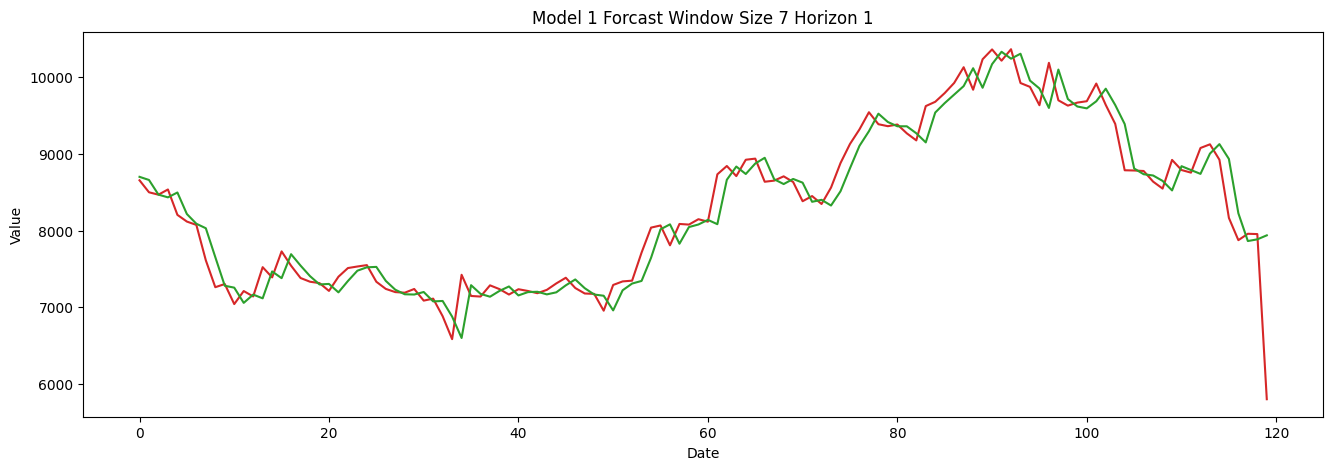

In [378]:
plot_forcast(pd.Series(np.squeeze(y_test_Horizons)), y_pred_1, start=0, end=120,title='Model 1 Forcast Window Size 7 Horizon 1')

## Model 2 : Same as Model 1,  Horizon = 1, window_size = 30

In [379]:
model_2 = dense_model(horizon=1, window_size=30)
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               3968      
                                                                 
 dense_41 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [380]:
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_train,y_test, window_size=30, horizon=1)

X_train_windowed shape: (2169, 30)
y_train_Horizons shape: (2169, 1)
X_test_windowed shape: (498, 30)
y_test_Horizons shape: (498, 1)


In [381]:
# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_2 = model_2.fit(X_train_windowed, y_train_Horizons,
                        epochs=100,
                        batch_size=128,
                        validation_data=(X_test_windowed, y_test_Horizons))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 1342.2356 - mae: 1342.2356 - val_loss: 5665.7568 - val_mae: 5665.7568
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 481.6273 - mae: 481.6273 - val_loss: 2197.2444 - val_mae: 2197.2444
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 320.5672 - mae: 320.5672 - val_loss: 1862.8265 - val_mae: 1862.8265
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 290.3071 - mae: 290.3071 - val_loss: 1211.3700 - val_mae: 1211.3700
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 267.1328 - mae: 267.1328 - val_loss: 1294.0192 - val_mae: 1294.0192
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 260.6031 - mae: 260.6031 - val_loss: 1086.7101 - val_mae: 1086.7101
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 225.6158 - mae: 225.6158 - val_loss: 1086.7018 - val_mae: 1086.7018
Epoch 8/100

In [382]:
# evaluate the model
model_2.evaluate(X_test_windowed, y_test_Horizons)

16/16 [==============================] - 0s 2ms/step - loss: 663.0149 - mae: 663.0149


[663.014892578125, 663.014892578125]

In [383]:
# y_pred for model_2
y_pred_2 = model_2.predict(X_test_windowed)
y_pred_2 = tf.squeeze(y_pred_2)
y_pred_2.shape , y_test_Horizons.shape

(TensorShape([498]), (498, 1))

In [384]:
model_2_forcast_metrics = evaluate_preds(y_test_Horizons, y_pred_2)
model_2_forcast_metrics

{'mae': 663.01,
 'mse': 1350078.84,
 'rmse': 1161.93,
 'mape': 100.88,
 'mase': 1.29}

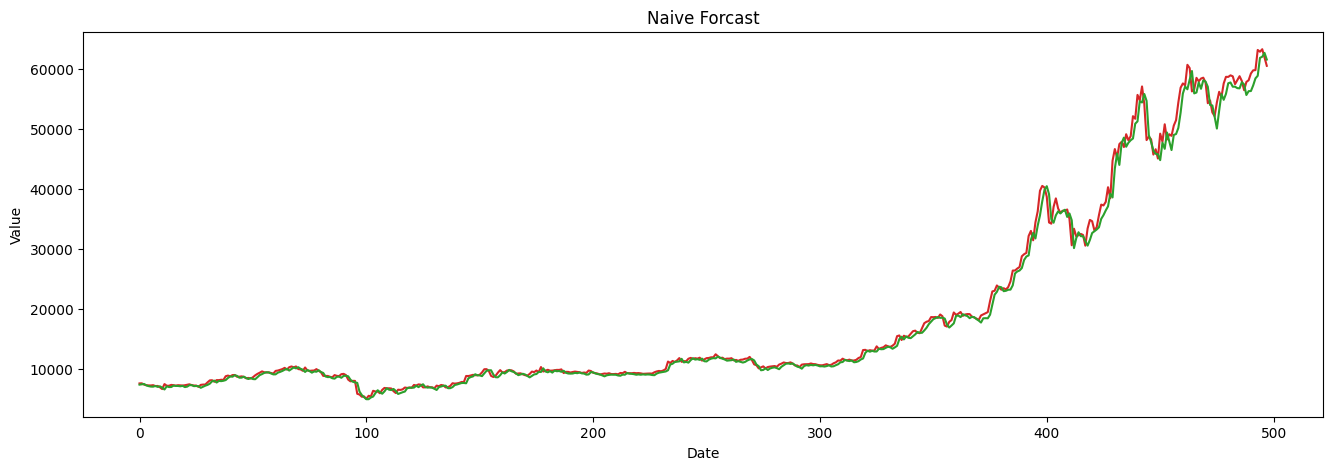

In [385]:
plot_forcast(pd.Series(np.squeeze(y_test_Horizons)), y_pred_2, start=0, end=None,title='Naive Forcast')

## Model 3 : Same as Model 1,  Horizon = 7, window_size = 30

In [386]:
model_3 = dense_model(horizon=7, window_size=30)
model_3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               3968      
                                                                 
 dense_43 (Dense)            (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [387]:
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_train,y_test, window_size=30, horizon=7)

X_train_windowed shape: (2169, 30)
y_train_Horizons shape: (2169, 7)
X_test_windowed shape: (498, 30)
y_test_Horizons shape: (498, 7)


In [388]:
# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_3 = model_3.fit(X_train_windowed, y_train_Horizons,
                        epochs=100,
                        batch_size=128,
                        validation_data=(X_test_windowed, y_test_Horizons))

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 1972.6539 - mae: 1972.6539 - val_loss: 4061.0642 - val_mae: 4061.0642
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 582.7750 - mae: 582.7750 - val_loss: 2473.5405 - val_mae: 2473.5405
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 424.1235 - mae: 424.1235 - val_loss: 2161.4167 - val_mae: 2161.4167
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 384.1454 - mae: 384.1454 - val_loss: 2065.3835 - val_mae: 2065.3835
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 359.1802 - mae: 359.1802 - val_loss: 1943.2557 - val_mae: 1943.2557
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 339.3275 - mae: 339.3275 - val_loss: 1781.7650 - val_mae: 1781.7650
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 319.2792 - mae: 319.2792 - val_loss: 1664.9417 - val_mae: 1664.9417
Epoch 8/100

In [389]:
# evaluate the model
model_3.evaluate(X_test_windowed, y_test_Horizons)

16/16 [==============================] - 0s 1ms/step - loss: 1173.0007 - mae: 1173.0007


[1173.000732421875, 1173.000732421875]

In [390]:
# y_pred for model_3
y_pred_3 = model_3.predict(X_test_windowed)
y_pred_3 = tf.squeeze(y_pred_3)
y_pred_3.shape , y_test_Horizons.shape

(TensorShape([498, 7]), (498, 7))

In [391]:
model_3_forcast_metrics = evaluate_preds(y_test_Horizons, y_pred_3)
model_3_forcast_metrics

{'mae': 1173.0, 'mse': 4926955.27, 'rmse': 2219.67, 'mape': 5.65, 'mase': 2.23}

## Model 4 : Conv1D

## Model 5 : LSTM

## Model 6 : Same as Model 1 with multivariate data

## Model 7 : N-BEATS Algorithm

## Model 8 : Ensemble Model

## Model 9 : Future Prediction Model

## Model 10 : Same as Model 1 with turkey data

# Evaluation of all Models

In [392]:
# Collect all the evaluation metrics for all the models as a data frame
model_evaluation_metrics = pd.DataFrame(
                                        {
                                            'naive_forcast':naive_forcast_metrics,
                                            'Dense_model_Horizon_1_window_size_7':model_1_forcast_metrics,
                                            'Dense_model_Horizon_1_window_size_30':model_2_forcast_metrics,
                                            'Dense_model_Horizon_7_window_size_30':model_3_forcast_metrics,
                                         },

                                        index=['mae', 'mse', 'rmse', 'mape', 'mase'])
model_evaluation_metrics.transpose()

,mae,mse,rmse,mape,mase
naive_forcast,567.98,1147547.13,1071.24,2.52,1.00
Dense_model_Horizon_1_window_size_7,556.51,1113523.04,1055.24,111.20,1.01
Dense_model_Horizon_1_window_size_30,663.01,1350078.84,1161.93,100.88,1.29
Dense_model_Horizon_7_window_size_30,1173.00,4926955.27,2219.67,5.65,2.23
